# Day 3: SHAP Explanation of Model Prediction

## 1. Objective
Apply SHAP to understand feature contributions to an individual prediction.

## 2. Key Steps
- Install and import SHAP
- Generate SHAP values for model + test instance
- Visualize and interpret local + global SHAP outputs

## 3. Results
- SHAP force plot for one instance
- SHAP summary plot for entire dataset

## 4. Summary
- Key features and their directional effects identified

In [1]:
# Install SHAP if needed
!pip install shap

# Imports
import shap
import numpy as np
import matplotlib.pyplot as plt

# Use this to avoid display errors in Jupyter
shap.initjs()

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Load and prepare
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = RandomForestClassifier().fit(X_train, y_train)

In [3]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

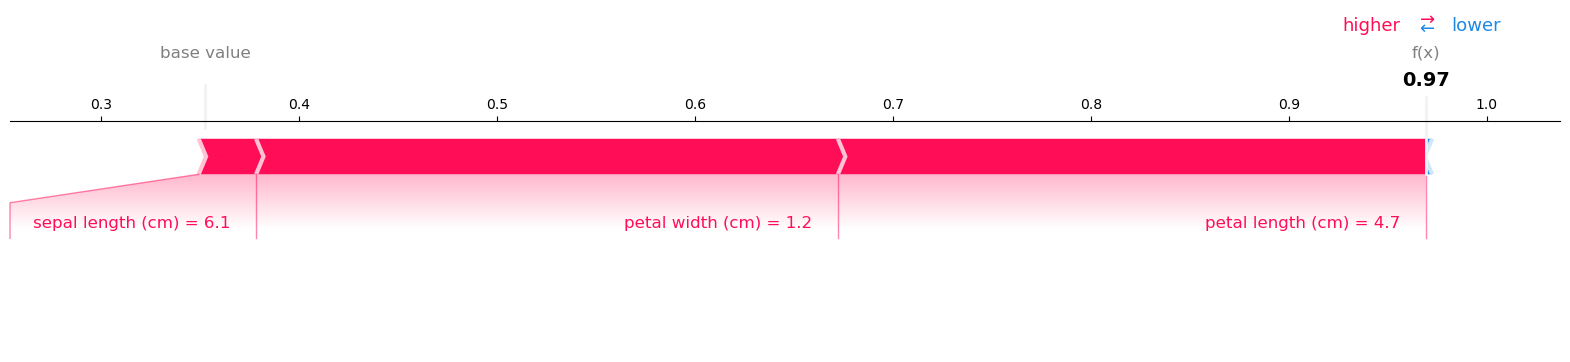

<Figure size 640x480 with 0 Axes>

In [29]:
import shap
shap.initjs()

i = 0  # instance index
c = 1  # class index (e.g. class 1)

# Assumes `shap_values = explainer(X_test)`
shap.force_plot(
    base_value=shap_values.base_values[i][c],
    shap_values=shap_values.values[i][:, c],
    features=X_test.iloc[i],
    matplotlib=True
)

plt.savefig("../plots/summary/force_plot_class1_instance0.png", bbox_inches='tight')

### SHAP Force Plot: Class 1 Prediction for Instance 0

#### How to Read a SHAP Force Plot

- **Force plots** explain *why* the model predicted a specific output for a single instance.
- The **gray vertical line** is the *base value* — the model’s average prediction across the dataset.
- The **colored bars** show how features *push the prediction higher (red)* or *lower (blue)* compared to the base.
- The value at the far right (`f(x) = 0.97`) is the model’s final prediction for this instance.
- Each feature’s name and value are shown below the corresponding force bar.

---

#### Interpretation

- **Base value**: ~0.29  
  → This is the average predicted probability for class 1 across all training data.

- **Final prediction**: **0.97**  
  → The model is highly confident this instance belongs to class 1.

- **Positive Contributors** (features that increased the probability):
  
  | Feature              | Value | Effect on Prediction |
  |----------------------|-------|-----------------------|
  | **Sepal length (cm)**| 6.1   | Strong positive effect |
  | **Petal width (cm)** | 1.2   | Moderate positive effect |
  | **Petal length (cm)**| 4.7   | Moderate positive effect |

> All three features **pushed the prediction toward class 1**, leading to a strong prediction of 0.97.

---

#### Summary

This force plot helps explain the *model's decision process* for this specific sample:  
Because the sepal and petal dimensions are larger than typical, the model strongly favors class 1 for this flower.

Class 0


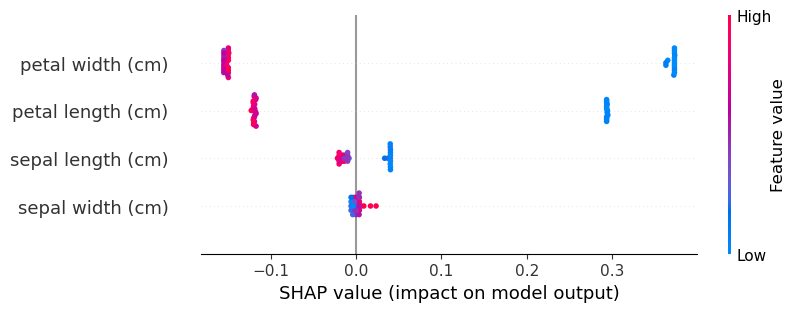

Class 1


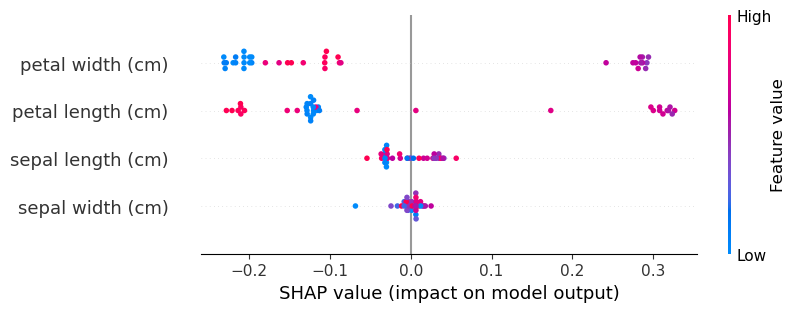

Class 2


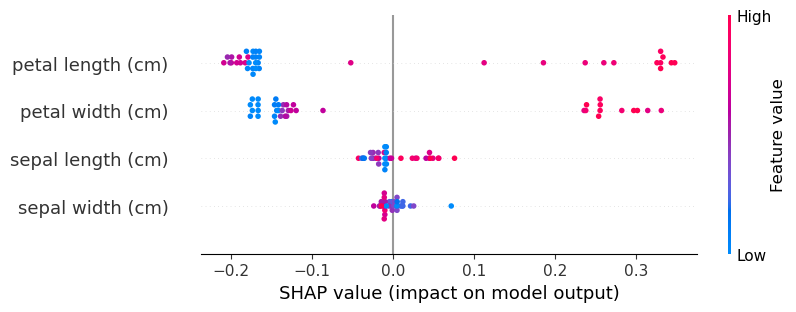

In [17]:
for class_index in range(3):  # or whatever num classes
    print(f"Class {class_index}")
    shap.plots.beeswarm(shap_values[..., class_index])

### SHAP Beeswarm Plot — Class 1

#### What You're Seeing

This SHAP beeswarm plot summarizes how each input feature influences the model’s prediction **for class 1** across the entire dataset.

- **Each dot** = one data point.
- **X-axis** = SHAP value (how much that feature pushes the model’s prediction *toward* or *away* from class 1):
  - Right of center → pushes model toward predicting class 1.
  - Left of center → pushes model away from class 1.
- **Color** = actual value of the feature for that point:
  - Blue = low value
  - Red = high value

---

#### Feature-by-Feature Breakdown

- **Petal width (cm)**:
  - **Low values (blue)** strongly push the prediction **away from class 1** (to the left).
  - **High values (red)** push prediction **toward class 1** (to the right).
  - ➕ Important: wide horizontal spread means this feature has a big influence.

- **Petal length (cm)**:
  - Shows a similar pattern: **short petals** → push away from class 1; **longer petals** → increase likelihood of class 1.
  - Less spread than petal width, but still very impactful.

- **Sepal length (cm)** and **sepal width (cm)**:
  - Small SHAP values (points cluster near zero).
  - Color is mixed across the x-axis, indicating **less consistent** influence.
  - These features are relatively **uninformative** for class 1.

---

#### How to Use This

This plot helps answer two key questions:

1. **Which features matter most?**
   - Look for rows with the widest SHAP spread: here, petal width and petal length.

2. **How do feature values influence predictions?**
   - Follow the color gradient: red values push right (increase prediction), blue values push left (decrease prediction).

---

#### Summary

- Most influential for class 1: **petal width** and **petal length**.
- Higher values of these features → increase likelihood of class 1.
- Lower values → reduce likelihood of class 1.
- Sepal measurements are not strong predictors for this class.

Class 0


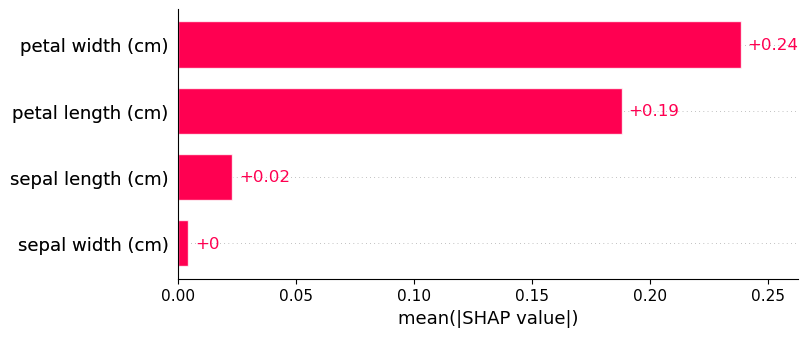

Class 1


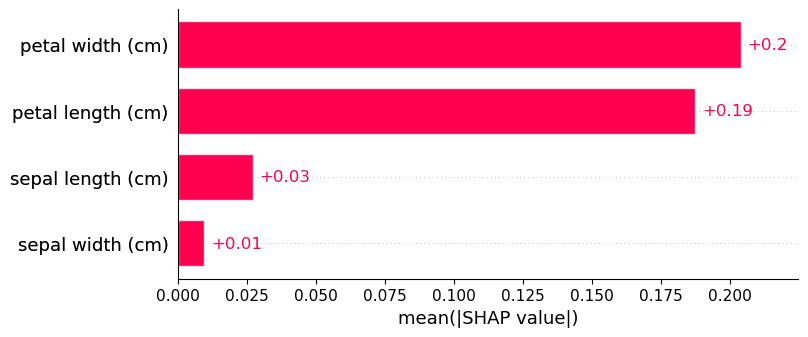

Class 2


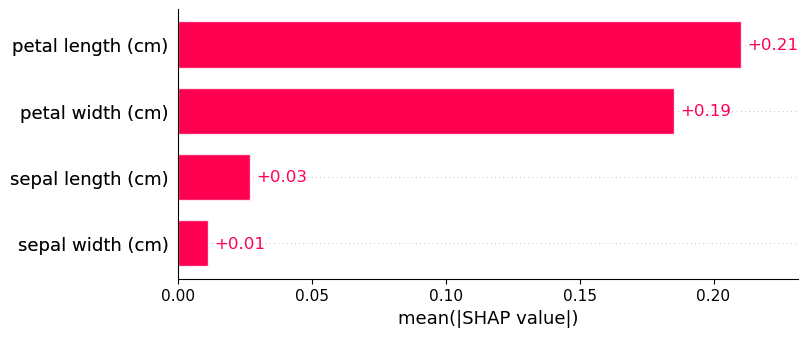

In [18]:
for class_index in range(3):  # or whatever num classes
    print(f"Class {class_index}")
    shap.plots.bar(shap_values[..., class_index])

### SHAP Bar Plot — Class 1

#### What You're Seeing

This SHAP bar plot shows the **average absolute impact** of each feature on the model’s prediction **for class 1**.

- **X-axis**: Mean absolute SHAP value — how much (on average) each feature influences predictions, regardless of direction (positive or negative).
- **Bars**: Longer bars mean **greater importance** for predicting class 1.
- This is a **global** explanation — it summarizes the behavior of the model across the entire dataset for this class.

---

#### Feature Importance (Class 1)

- **Petal width (cm)**:  
  - Most influential feature, with an average impact of **+0.20** on prediction probability for class 1.
  - This means changes in petal width significantly affect whether the model predicts class 1.

- **Petal length (cm)**:  
  - Close second in importance (**+0.19**).
  - Also plays a major role in distinguishing class 1 from the others.

- **Sepal length (cm)** and **sepal width (cm)**:  
  - Much lower importance (**+0.03** and **+0.01**, respectively).
  - These features have minimal effect on predicting class 1 — the model mostly ignores them.

---

#### How to Use This

- This chart **ranks features by average influence**, not direction.
- Use it to identify which features the model relies on most when making predictions for a specific class.
- Great for **feature selection**, **model interpretation**, or explaining model behavior to non-technical stakeholders.

---

#### Summary

- **Petal width** and **petal length** are the dominant drivers of class 1 predictions.
- Sepal features contribute very little.
- This confirms what the beeswarm plots suggest — the model relies heavily on **petal-related features** to decide if an instance belongs to class 1.